In [1]:
import math
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

random_seed = 42

In [2]:
data = pd.read_csv("../data/featured/data.csv", sep=';')

Xdata = data.drop('teamA_win', axis=1)
ydata = data.teamA_win

Xdata.columns

Index(['teamA', 'teamB', 'tournament', 'year', 'month', 'day', 'diff_GP',
       'ratio_GP', 'diff_AGT', 'ratio_AGT', 'diff_KD', 'ratio_KD', 'diff_CKPM',
       'ratio_CKPM', 'diff_GPR', 'ratio_GPR', 'diff_GSPD', 'ratio_GSPD',
       'diff_EGR', 'ratio_EGR', 'diff_MLR', 'ratio_MLR', 'diff_GD15',
       'ratio_GD15', 'diff_FB%', 'ratio_FB%', 'diff_FT%', 'ratio_FT%',
       'diff_F3T%', 'ratio_F3T%', 'diff_PPG', 'ratio_PPG', 'diff_HLD%',
       'ratio_HLD%', 'diff_GRB%', 'ratio_GRB%', 'diff_FD%', 'ratio_FD%',
       'diff_DRG%', 'ratio_DRG%', 'diff_ELD%', 'ratio_ELD%', 'diff_FBN%',
       'ratio_FBN%', 'diff_BN%', 'ratio_BN%', 'diff_LNE%', 'ratio_LNE%',
       'diff_JNG%', 'ratio_JNG%', 'diff_WPM', 'ratio_WPM', 'diff_CWPM',
       'ratio_CWPM', 'diff_WCPM', 'ratio_WCPM', 'diff_winrate%',
       'ratio_winrate%'],
      dtype='object')

In [3]:
Xtrain, Xval, ytrain, yval = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed)

In [4]:
clf = DecisionTreeClassifier(max_depth=15, random_state=random_seed)
clf.fit(Xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clf.predict(Xtrain))))
print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

accuracy score (train): 0.975744
accuracy score (val): 0.608264


In [6]:
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state = random_seed)
    clf.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, clf.predict(Xval)))

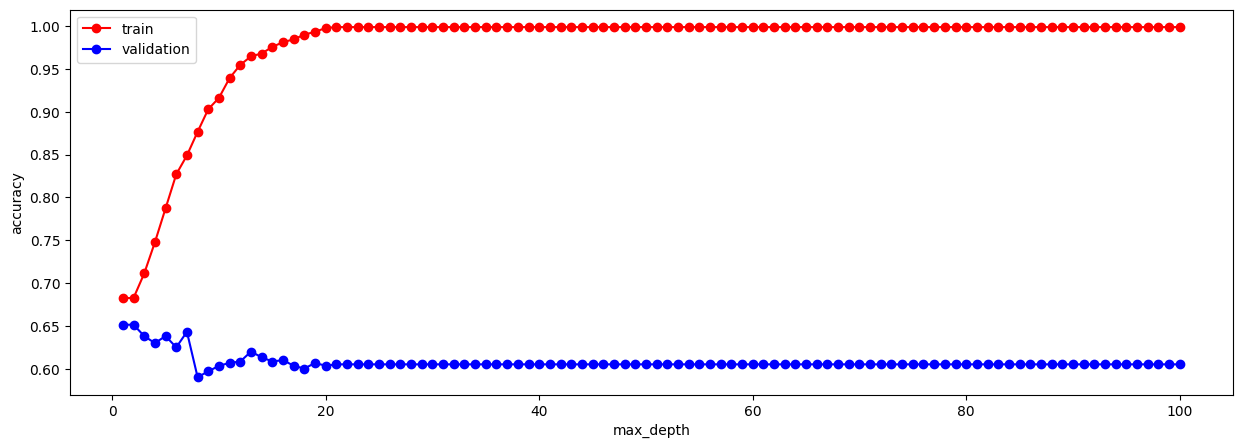

In [7]:
plt.figure(figsize=(15,5))
plt.plot(depths, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [8]:
optimal_depth = np.argmax(val_acc) + 1
print(f"optimal depth: {optimal_depth}")
clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state = random_seed)
clf.fit(Xtrain, ytrain)

print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

optimal depth: 1
accuracy score (val): 0.651240


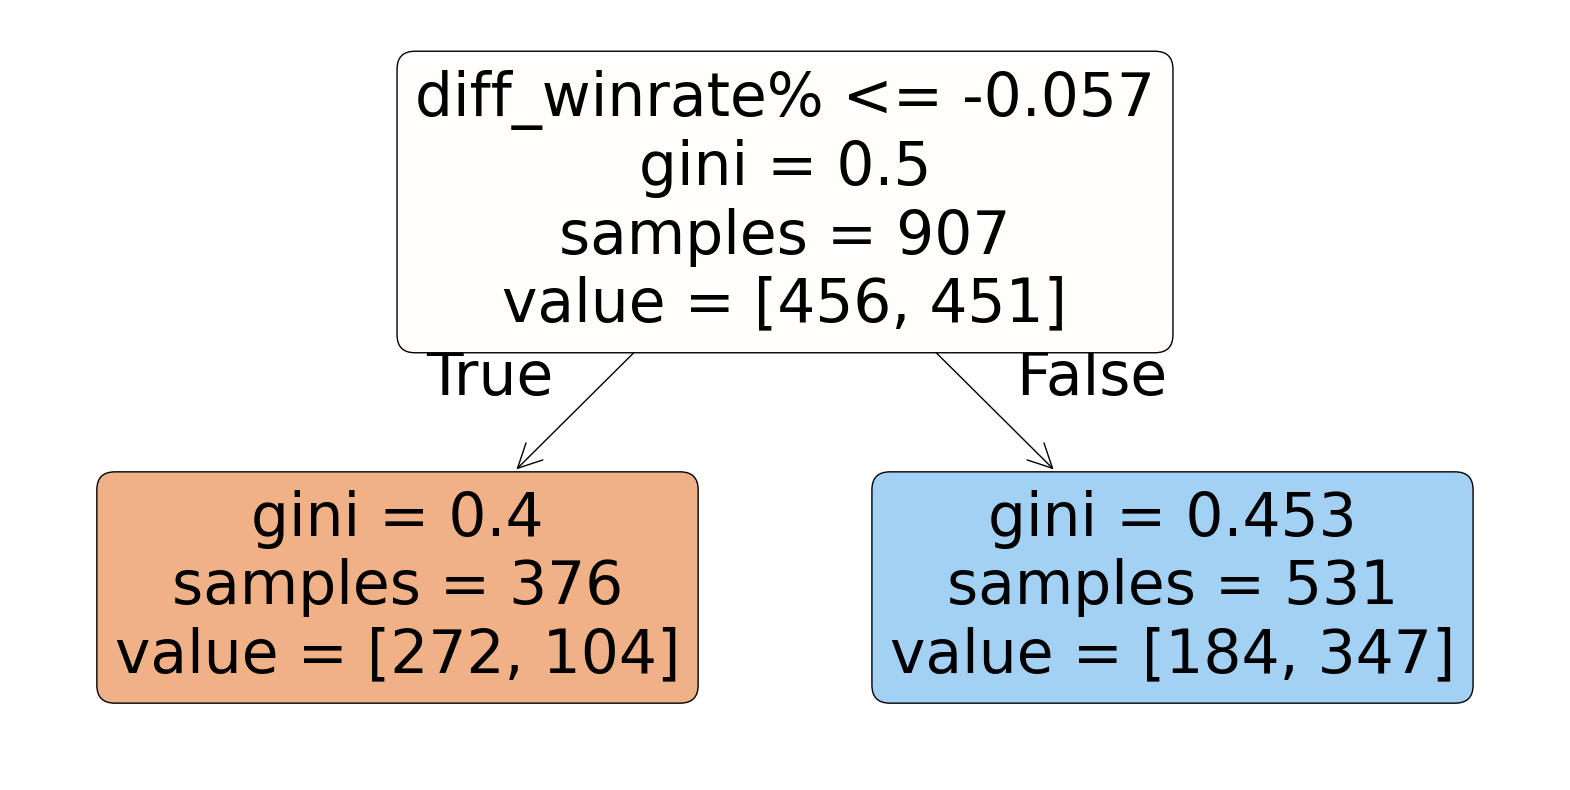

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=list(Xdata.columns),
    filled=True,
    rounded=True
)
plt.show()